In [3]:
pip install finnhub-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
# 1) finnhub-python 설치 (터미널에 한 번만 실행)
#    pip install finnhub-python

# 2) 라이브러리 임포트 및 API 키 설정
import finnhub

# Finnhub 클라이언트 초기화
API_KEY = "d1997v9r01qkcat6rsu0d1997v9r01qkcat6rsug"  # ← 여기에 본인의 Finnhub API 키 입력
finnhub_client = finnhub.Client(api_key=API_KEY)

# 3) 회사명으로 티커(symbol) 검색 함수 정의
def get_ticker(company_name: str) -> str | None:
    """
    company_name 이름으로 Finnhub 검색 API 호출 후,
    결과 중 첫 번째(symbol)를 반환.
    없으면 None 반환.
    """
    result = finnhub_client.symbol_lookup(company_name)
    matches = result.get('result', [])
    if matches:
        return matches[0]['symbol']
    return None

# 4) 테스트
if __name__ == "__main__":
    name = "Apple"
    ticker = get_ticker(name)
    if ticker:
        print(f"{name}의 티커는 {ticker} 입니다.")
    else:
        print(f"{name}에 대한 티커를 찾을 수 없습니다.")

Apple의 티커는 AAPL 입니다.


In [9]:
# 5) 추가 라이브러리 임포트
from datetime import datetime, timedelta
import pandas as pd

# 6) 회사명으로 티커 가져오기 (이전 함수 재사용)
company = "Apple"
ticker = get_ticker(company)
if not ticker:
    raise ValueError(f"{company}에 대한 티커를 찾을 수 없습니다.")

# 7) 날짜 범위 설정 (최근 30일)
today = datetime.today().date()
from_date = today - timedelta(days=30)
to_date = today

# 8) 뉴스 데이터 조회
news = finnhub_client.company_news(ticker, _from=from_date.isoformat(), to=to_date.isoformat())

# 9) DataFrame으로 변환 및 상위 20개 선택
df_news = pd.DataFrame(news)
df_recent20 = df_news.sort_values("datetime", ascending=False).head(20).reset_index(drop=True)

# 10) 확인용 출력
print(f"=== {company} ({ticker}) 최근 뉴스 20건 ===")
df_recent20

=== Apple (AAPL) 최근 뉴스 20건 ===


,category,datetime,headline,id,image,related,source,summary,url
0,company,1750265613,Apple Just Erased a $300 Million Problem--But ...,135370638,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,AAPL,Yahoo,A surprise courtroom reversal gives Apple brea...,https://finnhub.io/api/news?id=6d086dc6d16c899...
1,company,1750265040,Credit Card Annual Fees Are Going Up. What It ...,135370639,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,AAPL,Yahoo,Credit card issuers are trying to attract more...,https://finnhub.io/api/news?id=cc26a4fa5551d47...
2,company,1750263665,The Trump phone probably won’t be built in Ame...,135370640,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,AAPL,Yahoo,President Trump's family is launching a smartp...,https://finnhub.io/api/news?id=e9ee5f7addb9707...
3,company,1750258995,Apple: Quiet After WWDC,135373317,,AAPL,SeekingAlpha,,https://finnhub.io/api/news?id=8fbc130aed6ad79...
4,company,1750257002,Apple Just Snatched Back the Top Spot in China...,135362973,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,AAPL,Yahoo,Data showed that iPhones claimed the top spot ...,https://finnhub.io/api/news?id=23afc28b868ae10...
5,company,1750254925,"Analysts Cover Apple (NASDAQ:AAPL) After WWDC,...",135362975,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,AAPL,Yahoo,Apple Inc. (NASDAQ:AAPL) is one of the 10 stoc...,https://finnhub.io/api/news?id=b8fb845c5e8f1cc...
6,company,1750251540,Texas Instruments plans to invest more than $6...,135362978,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,AAPL,Yahoo,Texas Instruments (TI) (Nasdaq: TXN) today ann...,https://finnhub.io/api/news?id=18580ff8d445577...
7,company,1750249866,The Top 5 Analyst Questions From Apple’s Q1 Ea...,135362980,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,AAPL,Yahoo,Apple’s first quarter results modestly exceede...,https://finnhub.io/api/news?id=95dae6c9224b584...
8,company,1750242033,Trump says Apple is going to buy a lot of Trum...,135357266,,AAPL,Finnhub,U.S. President DonaldTrump said on Wednesday t...,https://finnhub.io/api/news?id=4601888d1372f42...
9,company,1750239000,It’s Time for UnitedHealth to Get Transparent ...,135362983,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,AAPL,Yahoo,Investors long trusted UnitedHealth to deliver...,https://finnhub.io/api/news?id=bcd8581b42ab2db...


In [12]:
# 1) 필요한 패키지 설치 (터미널에서 한 번만 실행)
#    pip install transformers torch

# 2) 라이브러리 임포트 및 FinBERT 파이프라인 초기화
from transformers import pipeline

# ProsusAI/finbert: 금융 텍스트 특화 감정분석 모델
finbert = pipeline(
    "sentiment-analysis",
    model="ProsusAI/finbert",
    tokenizer="ProsusAI/finbert"
)

# 3) FinBERT 감정분석 함수 정의
def analyze_sentiment_finbert(text: str) -> dict:
    """
    - FinBERT으로 감정분석 실행
    - 반환된 label과 score를 dict로 정리
    """
    result = finbert(text[:512])[0]  # 길이 제한 (토큰 수 과다 방지)
    # result: {'label': 'positive'|'neutral'|'negative', 'score': float}
    return {
        'finbert_label': result['label'].lower(),
        'finbert_score': result['score']
    }

# 4) DataFrame에 FinBERT 컬럼 추가
df_fin = df.copy()
df_fin['sent_finbert'] = df_fin['text_for_sentiment'].apply(analyze_sentiment_finbert)
df_fin = pd.concat([
    df_fin,
    df_fin['sent_finbert'].apply(pd.Series)
], axis=1).drop(columns=['sent_finbert'])

# 5) 결과 확인
print(df_fin[['headline', 'finbert_label', 'finbert_score']].head(10))

/Users/yeonseongmo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0


                                            headline finbert_label  \
0  Apple Just Erased a $300 Million Problem--But ...      positive   
1  Credit Card Annual Fees Are Going Up. What It ...      positive   
2  The Trump phone probably won’t be built in Ame...       neutral   
3                            Apple: Quiet After WWDC       neutral   
4  Apple Just Snatched Back the Top Spot in China...      positive   
5  Analysts Cover Apple (NASDAQ:AAPL) After WWDC,...       neutral   
6  Texas Instruments plans to invest more than $6...      positive   
7  The Top 5 Analyst Questions From Apple’s Q1 Ea...      negative   
8  Trump says Apple is going to buy a lot of Trum...       neutral   
9  It’s Time for UnitedHealth to Get Transparent ...      positive   

   finbert_score  
0       0.812219  
1       0.857421  
2       0.905977  
3       0.424185  
4       0.754661  
5       0.810726  
6       0.894223  
7       0.721075  
8       0.751397  
9       0.715269  


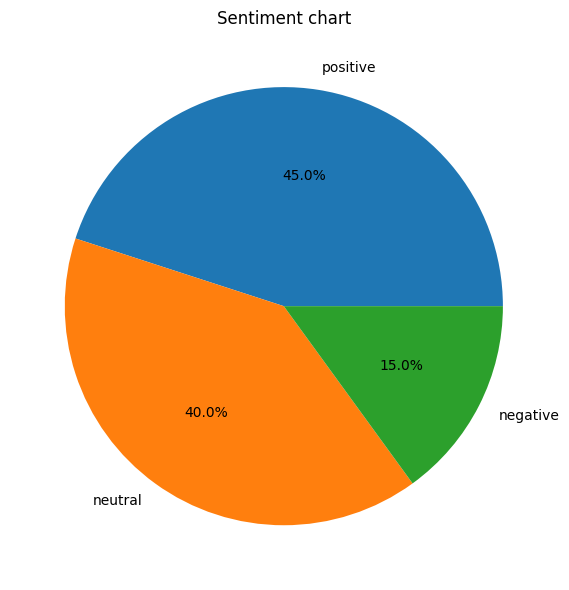

In [14]:
# 1) 라이브러리 임포트
import matplotlib.pyplot as plt

# 2) finbert_label 컬럼이 있는 DataFrame 불러오기
#    (이전 단계에서 만든 df_fin을 그대로 쓰거나, 
#     df_fin 변수가 없다면 아래처럼 다시 정의하세요.)
# df_fin = pd.read_pickle('df_fin.pkl')  # 예시: 저장해 두셨다면 불러오기

# 3) 라벨별 개수 계산
counts = df_fin['finbert_label'].value_counts()
labels = counts.index.tolist()
values = counts.values.tolist()

# 4) 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment chart')
plt.tight_layout()
plt.show()

In [19]:
# 확장된 투자 조언 함수 (긍정/부정 우선 → 중립 순)
def generate_advice(df_fin, pos_thresh=0.6, neg_thresh=0.6, neu_thresh=0.6):
    """
    - df_fin: FinBERT 분석 결과 DataFrame
    - pos_thresh: 긍정 비율 임계치 (예: 0.6 → 60%)
    - neg_thresh: 부정 비율 임계치
    - neu_thresh: 중립 비율 임계치
    """
    total = len(df_fin)
    pos_ratio = (df_fin['finbert_label'] == 'positive').sum() / total
    neg_ratio = (df_fin['finbert_label'] == 'negative').sum() / total
    neu_ratio = (df_fin['finbert_label'] == 'neutral').sum() / total

    # 1) 긍정 우세
    if pos_ratio >= pos_thresh:
        return f"긍정 비율 {pos_ratio:.1%} ≥ {pos_thresh:.1%} → BUY 추천"
    # 2) 부정 우세
    elif neg_ratio >= neg_thresh:
        return f"부정 비율 {neg_ratio:.1%} ≥ {neg_thresh:.1%} → SELL 추천"
    # 3) 중립 우세
    elif neu_ratio >= neu_thresh:
        return f"중립 비율 {neu_ratio:.1%} ≥ {neu_thresh:.1%} → 시장 불확실(NEUTRAL) → HOLD"
    # 4) 그 외
    else:
        return (f"긍정 {pos_ratio:.1%}, 부정 {neg_ratio:.1%}, 중립 {neu_ratio:.1%} → "
                "명확하지 않아 HOLD")

# 함수 실행 예시
advice = generate_advice(df_fin, pos_thresh=0.6, neg_thresh=0.6, neu_thresh=0.7)
print(advice)

긍정 45.0%, 부정 15.0%, 중립 40.0% → 명확하지 않아 HOLD
